In [29]:
import pandas as pd
import os
from sqlalchemy import create_engine
import numpy as np

In [2]:
engine = create_engine('sqlite:///fintrack.db')

In [7]:
for file in os.listdir('data'):
    if file.endswith('.csv'):
        df = pd.read_csv('data/'+file)

In [9]:
df.shape

(50000, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

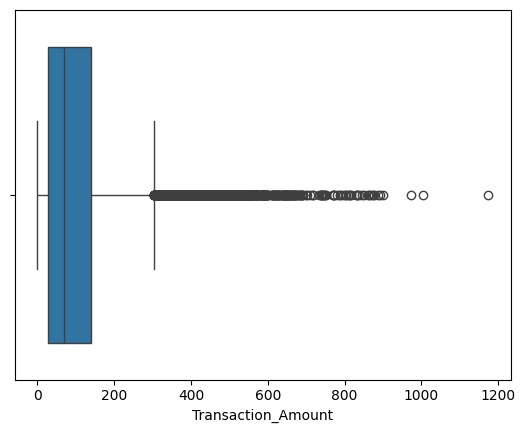

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Transaction_Amount'])
plt.show()


In [13]:
df.describe()

,Transaction_Amount,Timestamp,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,2023-07-02 12:47:11.063999744,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
min,0.000000,2023-01-01 00:01:00,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,2023-04-02 03:35:30,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,2023-07-02 14:00:00,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,2023-10-01 07:13:00,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,2023-12-31 23:50:00,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000
std,98.687292,NaN,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996


In [14]:
#handling outliers
upper_limit  = df['Transaction_Amount'].quantile(0.99)
upper_limit

np.float64(453.5116000000003)

In [15]:
lower_limit  = df['Transaction_Amount'].quantile(0.01)
lower_limit

np.float64(0.9899000000000001)

In [32]:

newdf = df.copy()
newdf['Transaction_Amount'] = np.where(
    newdf['Transaction_Amount'] > upper_limit, upper_limit,
    np.where(newdf['Transaction_Amount'] < lower_limit, lower_limit, newdf['Transaction_Amount'])
)


In [33]:
newdf['Transaction_Amount'].describe()

count    50000.000000
mean        98.417488
std         93.916104
min          0.989900
25%         28.677500
50%         69.660000
75%        138.852500
max        453.511600
Name: Transaction_Amount, dtype: float64

In [27]:
df['Transaction_Amount'].describe()

count    50000.000000
mean        99.411012
std         98.687292
min          0.000000
25%         28.677500
50%         69.660000
75%        138.852500
max       1174.140000
Name: Transaction_Amount, dtype: float64

In [39]:
newdf['Transaction_ID  .duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [41]:
newdf.to_csv('cleaned_fintack_data.csv', index=False)